In [49]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [50]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [51]:
X_train.shape

(50000, 32, 32, 3)

In [52]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [53]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [54]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [55]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    class_name = classes[int(y[index])]
    plt.xlabel(class_name)

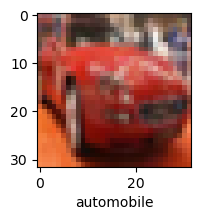

In [56]:
plot_sample(X_train,y_train,5)

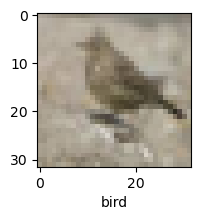

In [57]:
plot_sample(X_train,y_train,120)

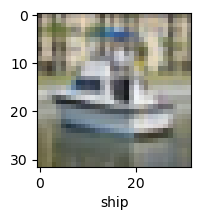

In [58]:
plot_sample(X_train,y_train,501)

In [59]:
X_train=X_train/255.0
X_test=X_test/255.0

In [60]:
ann = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

# Compile the model
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
ann.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 113s 71ms/step - loss: 1.8088 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.6217 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.5409 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4808 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 109s 69ms/step - loss: 1.4300 - accuracy: 0.4947


In [61]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('Classification report: \n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 17ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.51      0.54      1000
           1       0.47      0.71      0.56      1000
           2       0.46      0.23      0.30      1000
           3       0.38      0.19      0.25      1000
           4       0.43      0.41      0.42      1000
           5       0.38      0.41      0.39      1000
           6       0.49      0.60      0.54      1000
           7       0.75      0.32      0.44      1000
           8       0.60      0.61      0.60      1000
           9       0.37      0.69      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



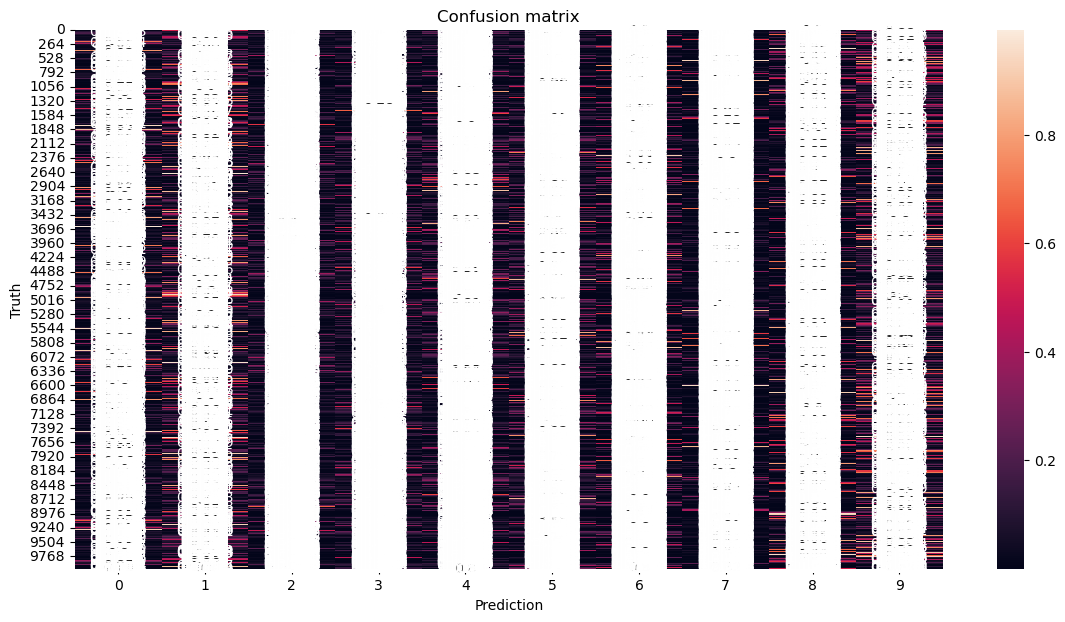

In [62]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(y_pred,annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show()

In [63]:
cnn=tf.keras.models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [64]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [65]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 31ms/step - loss: 1.4852 - accuracy: 0.4659
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1363 - accuracy: 0.6005
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0048 - accuracy: 0.6476
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9177 - accuracy: 0.6796
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8504 - accuracy: 0.7043
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7853 - accuracy: 0.7284
Epoch 7/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.7386 - accuracy: 0.7430
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6930 - accuracy: 0.7610
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6479 - accuracy: 0.7753
Epoch 10/10
1563/1563 [==============================] - 46s 29m

In [66]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9309 - accuracy: 0.6960


[0.9309355616569519, 0.6959999799728394]

In [67]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[7.8607805e-04, 2.6744205e-04, 2.4109658e-02, 6.8613678e-01,
        6.8805306e-03, 1.9920497e-01, 6.9489807e-02, 3.6587607e-04,
        1.2696329e-02, 6.2566120e-05],
       [2.3532090e-04, 1.4248665e-03, 2.0650207e-07, 3.5837587e-08,
        1.3069635e-09, 3.7282216e-10, 2.6559528e-09, 6.2431282e-11,
        9.9829763e-01, 4.2020012e-05],
       [3.8101327e-01, 9.2040248e-02, 1.7487116e-02, 7.2088591e-03,
        1.0496537e-03, 4.6777108e-04, 3.2939173e-05, 1.7536707e-03,
        4.9242005e-01, 6.5263743e-03],
       [9.1060007e-01, 2.0020843e-02, 4.4679146e-02, 4.4390764e-03,
        7.3924760e-04, 6.3137618e-06, 1.0743907e-03, 8.3821069e-04,
        1.7459085e-02, 1.4363779e-04],
       [3.1747379e-07, 1.3408744e-05, 2.1846386e-02, 1.0091915e-01,
        4.9128047e-01, 4.5288969e-03, 3.8137537e-01, 6.3068269e-06,
        2.8619264e-05, 1.1109281e-06]], dtype=float32)

In [68]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [69]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

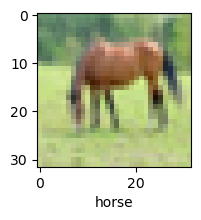

In [70]:
plot_sample(X_test,y_test,60)

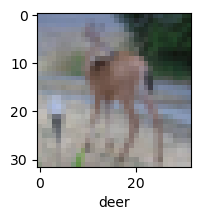

In [71]:
plot_sample(X_test,y_test,100)

In [72]:
classes[y_classes[60]]

'horse'